In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../0_python_modules/')
import extras

In [2]:
def get_fmean(fs, rs):
    '''
    lets say a feature of f score is composed of r residues, 
    then each residue shall get f/r share of the score
    '''
    fs = np.mean(fs, axis=0)
    if len(fs) != len(rs):
        raise ValueError('il y a un problème')
        
    res = np.unique(np.concatenate((rs)))
    fimps={r:0 for r in res}
    
    for a,f in enumerate(fs):
        for r in rs[a]:
            fimps[r] += f/len(rs[a])
            
    return fimps


def get_fnum(fs, rs, nr):
    '''
    lets say a feature of f score is composed of r residues, 
    then each residue shall get a score of +1
    all analysis is based on top nr features
    '''
    fs = np.concatenate(([f.argsort()[::-1][:nr] for f in fs]))
    fs = np.concatenate(([rs[i] for i in fs]))
    
    res = np.unique(fs)
    fimps = {r:0 for r in res}
    
    for a,f in enumerate(fs):
        fimps[f] += 1
        
    return fimps


def get_normalize(fs, rmini, rmaxi):
    '''
    normalize the resid - for visualization
    '''
    rs, fs = np.array(list(fs.items())).T
    fs = (fs-fs.min())/(fs.max()-fs.min())
    fs = fs*(rmaxi-rmini) + rmini
    return np.column_stack((rs, fs))

<font size=4>
    by taking all 4 states: <br>
    there are 4 cases, <br>
    supervised_dih_all, urf_dih_all, urf_dih_red, urf_coords <br><br>

In [3]:
def cluster(hc, nids=range(2,11)):
    for h in nids:
        hl=extras.get_hc_dtraj(hc, nids=h)
        print(h, {i:np.where(hl==i)[0].shape for i in np.unique(hl)})

In [12]:
cluster(np.load('saved_urf_all/hc_permute.npy'))

2 {0: (50036,), 1: (81215,)}
3 {0: (50036,), 1: (13567,), 2: (67648,)}
4 {0: (50036,), 1: (13567,), 2: (10219,), 3: (57429,)}
5 {0: (50036,), 1: (13567,), 2: (10219,), 3: (49,), 4: (57380,)}
6 {0: (50036,), 1: (13567,), 2: (10219,), 3: (49,), 4: (1,), 5: (57379,)}
7 {0: (50036,), 1: (13567,), 2: (10219,), 3: (49,), 4: (1,), 5: (8,), 6: (57371,)}
8 {0: (13567,), 1: (10219,), 2: (49,), 3: (1,), 4: (8,), 5: (57371,), 6: (13713,), 7: (36323,)}
9 {0: (13567,), 1: (10219,), 2: (49,), 3: (1,), 4: (8,), 5: (57371,), 6: (13713,), 7: (32815,), 8: (3508,)}
10 {0: (13567,), 1: (10219,), 2: (49,), 3: (1,), 4: (8,), 5: (13713,), 6: (32815,), 7: (3508,), 8: (22841,), 9: (34530,)}


In [13]:
cluster(np.load('saved_reduced_urf_all/hc_permute.npy'))

2 {0: (59275,), 1: (71976,)}
3 {0: (59275,), 1: (2,), 2: (71974,)}
4 {0: (2,), 1: (71974,), 2: (10549,), 3: (48726,)}
5 {0: (2,), 1: (10549,), 2: (48726,), 3: (49084,), 4: (22890,)}
6 {0: (2,), 1: (10549,), 2: (48726,), 3: (49084,), 4: (2,), 5: (22888,)}
7 {0: (2,), 1: (10549,), 2: (49084,), 3: (2,), 4: (22888,), 5: (26215,), 6: (22511,)}
8 {0: (2,), 1: (49084,), 2: (2,), 3: (22888,), 4: (26215,), 5: (22511,), 6: (8514,), 7: (2035,)}
9 {0: (2,), 1: (49084,), 2: (2,), 3: (22888,), 4: (26215,), 5: (8514,), 6: (2035,), 7: (12384,), 8: (10127,)}
10 {0: (2,), 1: (2,), 2: (22888,), 3: (26215,), 4: (8514,), 5: (2035,), 6: (12384,), 7: (10127,), 8: (18749,), 9: (30335,)}


In [14]:
cluster(np.load('saved_urf_coords/hc_permute.npy'))

2 {0: (24,), 1: (149976,)}
3 {0: (24,), 1: (35,), 2: (149941,)}
4 {0: (24,), 1: (35,), 2: (56,), 3: (149885,)}
5 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (149853,)}
6 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (27,), 5: (149826,)}
7 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (27,), 5: (36,), 6: (149790,)}
8 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (27,), 5: (36,), 6: (24,), 7: (149766,)}
9 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (27,), 5: (36,), 6: (24,), 7: (23,), 8: (149743,)}
10 {0: (24,), 1: (35,), 2: (56,), 3: (32,), 4: (27,), 5: (36,), 6: (24,), 7: (23,), 8: (28142,), 9: (121601,)}


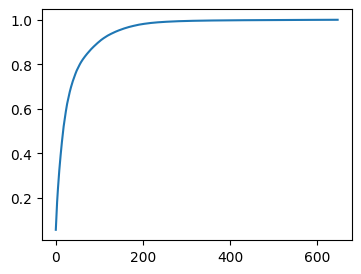

In [7]:
fimps = np.mean([np.load(f'saved_clf_all/fimp_all_{i}.npy') for i in range(5)], axis=0)
fimps = np.cumsum(fimps[fimps.argsort()[::-1]])
plt.plot(fimps)

In [8]:
cmaps=mt.cm.get_cmap('Reds')

/tmp/ipykernel_1559100/1619998289.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps=mt.cm.get_cmap('Reds')


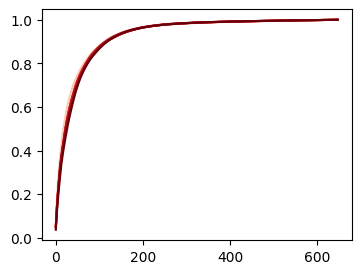

In [9]:
for h in range(2,11):
    fimps = np.mean([np.load(f'saved_urf_all/fimp_hlabel{h}_{i}.npy') for i in range(5)], axis=0)
    fimps = np.cumsum(fimps[fimps.argsort()[::-1]])
    plt.plot(fimps, color=cmaps(h/10))
plt.show()

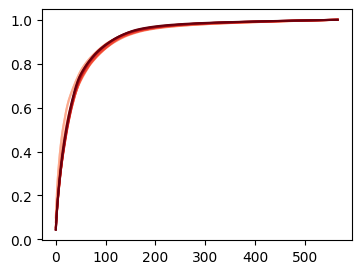

In [10]:
for h in range(2,11):
    fimps = np.mean([np.load(f'saved_reduced_urf_all/fimp_hlabel{h}_{i}.npy') for i in range(5)], axis=0)
    fimps = np.cumsum(fimps[fimps.argsort()[::-1]])
    plt.plot(fimps, color=cmaps(h/10))
plt.show()

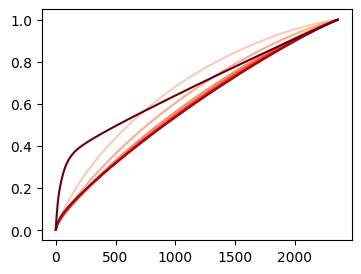

In [11]:
for h in range(2,11):
    fimps = np.mean([np.load(f'saved_urf_coords/fimp_hlabel{h}_{i}.npy') for i in range(5)], axis=0)
    fimps = np.cumsum(fimps[fimps.argsort()[::-1]])
    plt.plot(fimps, color=cmaps(h/10))
plt.show()

## data

In [4]:
names = ['supervised_all', 'urf_all', 'urf_red', 'urf_coords']

In [5]:
resids_dihedral_all = np.load('../../../1_datasets/mopR_ensembles/phi_psi_chi1_resids.npz')
resids_dihedral_all = [resids_dihedral_all[i] for i in list(resids_dihedral_all)]

In [6]:
resids_dihedral_red = [i for i in resids_dihedral_all if all((i>=20)&(i<=220))]

In [7]:
dd = [i for i in range(20,221) if i!=148]
atoms=['N','CA','CB','C']
resids_coords = []
for line in open('../../../1_datasets/mopR_ensembles/pbc_trjs/w.pdb', 'r'):
    items = line.strip().split()
    if items[0] == 'ATOM':
        if items[2] in atoms:
            if int(items[4]) in dd:
                resids_coords.append([items[4]]*3)
resids_coords = np.array(np.concatenate((resids_coords))).astype(int)[:,None]

In [8]:
resids_ = [resids_dihedral_all, resids_dihedral_all, resids_dihedral_red, resids_coords]

In [9]:
fsupervised = [np.load(f'saved_clf_all/fimp_all_{i}.npy') for i in range(5)]

In [14]:
furf_all = [np.load(f'saved_urf_all/fimp_hlabel2_{i}.npy') for i in range(5)]
furf_red = [np.load(f'saved_reduced_urf_all/fimp_hlabel2_{i}.npy') for i in range(5)]
furf_coords = [np.load(f'saved_urf_coords/fimp_hlabel2_{i}.npy') for i in range(5)]

In [15]:
fimps = [fsupervised, furf_all, furf_red, furf_coords]

In [16]:
for a,n in enumerate(names):
    dd = get_normalize(
            get_fmean(fimps[a], resids_[a]),
    rmini=0, rmaxi=1)
    np.savetxt(f'saved_fimps/fmean_{names[a]}.txt', dd, fmt=['%4d','%10.4f'])

In [17]:
for a,n in enumerate(names):
    dd = get_normalize(
            get_fnum(fimps[a], resids_[a], 100),
    rmini=0, rmaxi=1)
    np.savetxt(f'saved_fimps/fnum_{names[a]}.txt', dd, fmt=['%4d','%10.4f'])